In [1]:
import sys
sys.path.append('../pyclk')
from pyclk import Module, Sig, In, Out, Reg, Trace

In [2]:
class counter(Module):
    def __init__(s):
        with s.setup():
            s.i_rst = In()
            s.o_cnt = Out()
            s.r_cnt = Reg()
    def logic(s):
        # logic goes here:
        if s.i_rst == 1:
            s.r_cnt = 0
        else:
            s.r_cnt = s.r_cnt.q + 1
        s.o_cnt = s.r_cnt.q

class toplevel(Module):
    def __init__(s):
        with s.setup():
            # declare signals, registers, I/Os:
            s.i_rst1 = In()
            s.i_rst2 = In()
            s.o_cnt1 = Out()
            s.o_cnt2 = Out()
            # instanciate sub-modules and make connections:
            s.u_counter1 = _ = counter()
            _.i_rst(s.i_rst1)
            _.o_cnt(s.o_cnt1)
            s.u_counter2 = _ = counter()
            _.i_rst(s.i_rst2)
            _.o_cnt(s.o_cnt2)

In [3]:
u_toplevel = toplevel()

trace = Trace()
trace.add(u_toplevel.o_cnt1)
trace.add(u_toplevel.o_cnt2)

u_toplevel.i_rst1 = 1
u_toplevel.i_rst2 = 1

u_toplevel.run(3, trace=trace)
u_toplevel.i_rst1 = 0
u_toplevel.run(trace=trace)
u_toplevel.i_rst2 = 0
u_toplevel.run(5, trace=trace)

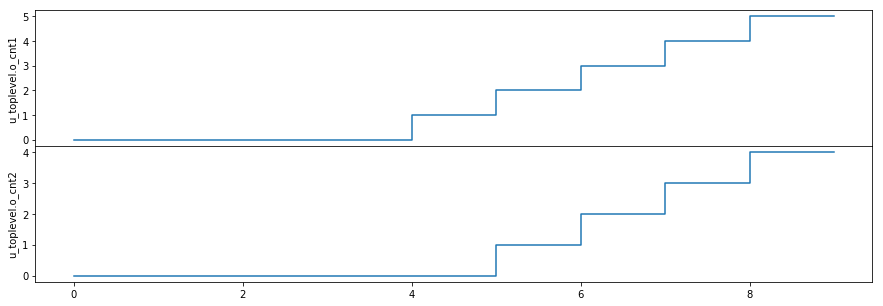

In [4]:
trace.plot()